C:\Users\hamma\AppData\Local\Temp\ipykernel_24488\2888156587.py:16: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  event_log = pd.read_csv(event_log_path, parse_dates=["timestamp"], infer_datetime_format=True)
d:\RapidMine stuff\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
d:\RapidMine stuff\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

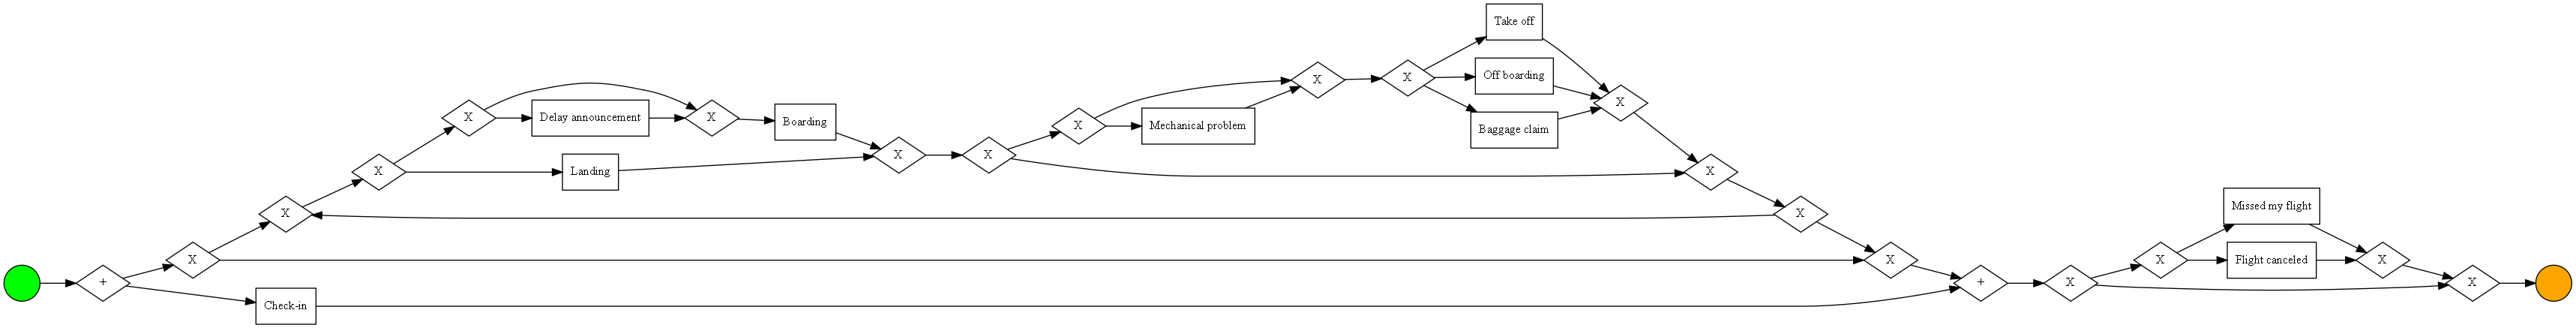

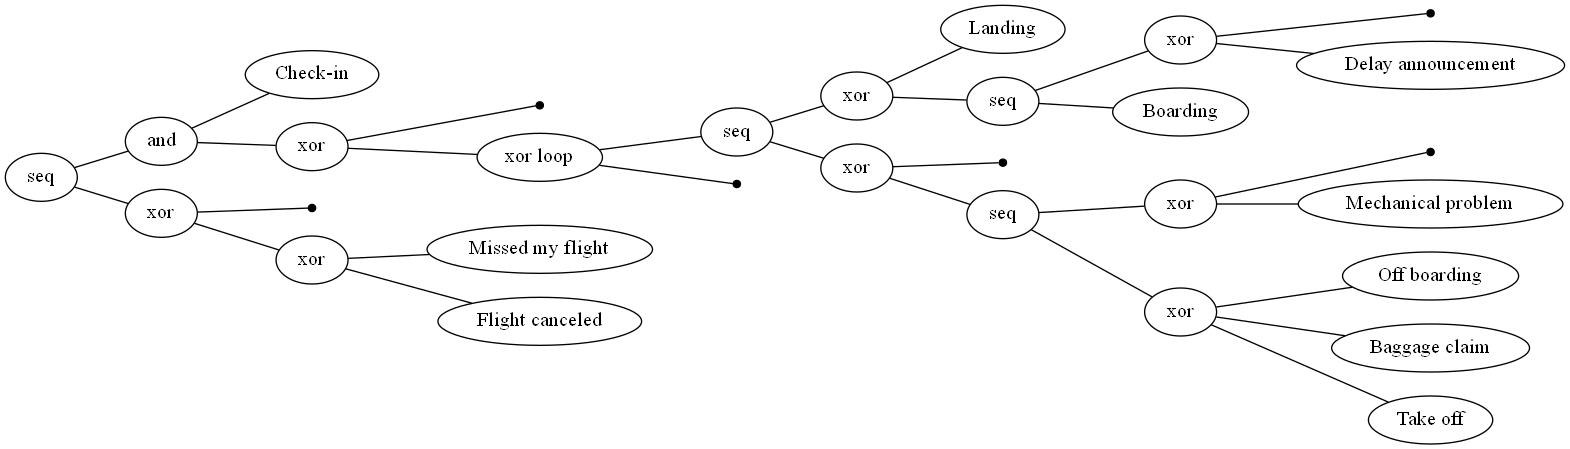

In [27]:
import random
# import spacy
import pandas as pd
from datetime import datetime, timedelta
import os
import re
import pm4py
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# from pm4py.statistics.duration.log import get as duration_statistics
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.process_tree import visualizer as pt_visualizer


# Generate BPMN from the event log
def generate_bpmn_from_event_log(event_log_path):
    event_log = pd.read_csv(event_log_path, parse_dates=["timestamp"], infer_datetime_format=True)
    dataframe = pm4py.format_dataframe(event_log, case_id='Flight', activity_key='Activity', timestamp_key='timestamp')
    event_log = pm4py.convert_to_event_log(dataframe)
    tree = pm4py.discover_process_tree_inductive(event_log)
    bpmn_graph = pm4py.convert_to_bpmn(tree)
    # net, initial_marking, final_marking = inductive_miner.apply(event_log)

    #save it to .bpmn file
    pm4py.write_bpmn(bpmn_graph, "bpmn.bpmn")
    pm4py.view_bpmn(bpmn_graph)
    gviz = pt_visualizer.apply(tree)
    pt_visualizer.view(gviz)

# tasks = tasks_with_lemmatized_verb
# conditions = extract_conditions_from_text(TEXT)

# print(conditions)

# # Combine tasks and conditions (this can be further refined based on the specific requirements)
# combined_tasks = tasks + conditions

event_log_path = 'flight_event_log.csv'
generate_bpmn_from_event_log(event_log_path)



In [15]:
import pm4py
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter

# Load the event log
event_log_path = "flight_event_log.csv"  # Update this with the correct path
event_log = pd.read_csv(event_log_path, parse_dates=["timestamp"], infer_datetime_format=True)

# Format the DataFrame for PM4Py
dataframe = pm4py.format_dataframe(event_log, case_id='Flight', activity_key='Activity', timestamp_key='timestamp')

# Convert the DataFrame to an Event Log
event_log = pm4py.convert_to_event_log(dataframe)

# Discover process tree and convert to BPMN (if needed)
tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_graph = pm4py.convert_to_bpmn(tree)

# Calculate case durations
# Group by 'Flight' and calculate the duration
dataframe['case_duration'] = dataframe.groupby('Flight')['timestamp'].transform(lambda x: x.max() - x.min())

# Now you can calculate average duration and identify long cases
avg_duration = dataframe['case_duration'].mean()
print(f"Average Case Duration: {avg_duration}")

# Identifying cases that take longer than average
long_cases = dataframe[dataframe['case_duration'] > avg_duration]

print(f"Number of long cases: {len(set(long_cases['Flight']))}")
print(f"Long cases: {long_cases['Flight'].unique()}")
print(f"total number of cases: {len(dataframe['Flight'].unique())}")
print(f"All cases: {dataframe['Flight'].unique()}")



Average Case Duration: 0 days 08:21:35.217391304
Number of long cases: 7
Long cases: ['FN338' 'LH458' 'LH459' 'TR320' 'TR321' 'TR520' 'TR521']
total number of cases: 17
All cases: ['FN338' 'GH2230' 'LH2286' 'LH2306' 'LH458' 'LH459' 'LH655' 'LN200'
 'LN205' 'MU220' 'MU330' 'PR120' 'PR121' 'TR320' 'TR321' 'TR520' 'TR521']


C:\Users\hamma\AppData\Local\Temp\ipykernel_24488\3237466163.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  event_log = pd.read_csv(event_log_path, parse_dates=["timestamp"], infer_datetime_format=True)
d:\RapidMine stuff\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
d:\RapidMine stuff\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, plea

In [1]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

# Generate BPMN from the event log with swimlanes
def generate_bpmn_from_event_log(event_log_path):
    # Read the event log
    event_log = pd.read_csv(event_log_path, parse_dates=["timestamp"], infer_datetime_format=True)
    
    # Format the dataframe
    dataframe = pm4py.format_dataframe(event_log, case_id='Flight', activity_key='Activity', timestamp_key='timestamp', resource_key='resource')
    
    # Convert the dataframe to an event log
    event_log = pm4py.convert_to_event_log(dataframe)
    
    # Discover a process tree from the event log
    tree = pm4py.discover_process_tree_inductive(event_log)
    
    # Convert the process tree to a BPMN model
    bpmn_graph = pt_converter.apply(tree, variant=pt_converter.Variants.TO_BPMN)
    
    # Generate BPMN visualization with swimlanes
    parameters = {bpmn_visualizer.Variants.CLASSIC.value.Parameters.ENABLE_RESOURCE: True}
    gviz = bpmn_visualizer.apply(bpmn_graph, parameters=parameters)
    
    # View the BPMN graph
    bpmn_visualizer.view(gviz)

# Path to the event log CSV file
event_log_path = 'modified_flight_event_log.csv'
generate_bpmn_from_event_log(event_log_path)


C:\Users\hamma\AppData\Local\Temp\ipykernel_38332\1381199596.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  event_log = pd.read_csv(event_log_path, parse_dates=["timestamp"], infer_datetime_format=True)


TypeError: format_dataframe() got an unexpected keyword argument 'resource_key'

In [2]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

# Generate BPMN from the event log with swimlanes
def generate_bpmn_from_event_log(event_log_path):
    # Read the event log
    event_log = pd.read_csv(event_log_path, parse_dates=["timestamp"], infer_datetime_format=True)
    
    # Format the dataframe
    dataframe = pm4py.format_dataframe(event_log, case_id='Flight', activity_key='Activity', timestamp_key='timestamp')
    
    # Convert the dataframe to an event log
    event_log = pm4py.convert_to_event_log(dataframe)
    
    # Discover a process tree from the event log
    tree = pm4py.discover_process_tree_inductive(event_log)
    
    # Convert the process tree to a BPMN model
    bpmn_graph = pt_converter.apply(tree, variant=pt_converter.Variants.TO_BPMN)
    
    # Generate BPMN visualization with swimlanes
    parameters = {bpmn_visualizer.Variants.CLASSIC.value.Parameters.ENABLE_RESOURCE: True}
    gviz = bpmn_visualizer.apply(bpmn_graph, parameters=parameters)
    
    # View the BPMN graph
    bpmn_visualizer.view(gviz)

# Path to the event log CSV file
event_log_path = 'modified_flight_event_log.csv'
generate_bpmn_from_event_log(event_log_path)


C:\Users\hamma\AppData\Local\Temp\ipykernel_38332\3703791256.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  event_log = pd.read_csv(event_log_path, parse_dates=["timestamp"], infer_datetime_format=True)
d:\RapidMine stuff\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
d:\RapidMine stuff\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, plea

AttributeError: ENABLE_RESOURCE

In [18]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
# from pm4py.statistics.traces.log import case_statistics

# Load the CSV file
file_path = 'flight_event_log.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the dataframe by case and timestamp
df = df.sort_values(by=['Flight', 'timestamp'])

# Rename columns to comply with pm4py format
df = df.rename(columns={'Flight': 'case:concept:name', 'Activity': 'concept:name', 'timestamp': 'time:timestamp'})

# Convert the DataFrame to EventLog
log = log_converter.apply(df)

# Discover the process model using Alpha Miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# Calculate the average duration for each activity
average_duration_per_activity = {}
for trace in log:
    for i in range(0, len(trace) - 1):
        current_activity = trace[i]['concept:name']
        next_activity = trace[i + 1]['concept:name']
        duration = (trace[i + 1]['time:timestamp'] - trace[i]['time:timestamp']).total_seconds()
        if current_activity not in average_duration_per_activity:
            average_duration_per_activity[current_activity] = []
        average_duration_per_activity[current_activity].append(duration)

for activity in average_duration_per_activity:
    average_duration_per_activity[activity] = sum(average_duration_per_activity[activity]) / len(average_duration_per_activity[activity])

# Output the average duration per activity
print(average_duration_per_activity)
print(log)



{'Check-in': 3698.823529411765, 'Boarding': 2294.1176470588234, 'Take off': 19056.923076923078, 'Landing': 2547.6923076923076, 'Mechanical problem': 3200.0, 'Off boarding': 2360.0, 'Delay announcement': 8292.0, 'Baggage claim': 24720.0}
[{'attributes': {'concept:name': 'FN338'}, 'events': [{'concept:name': 'Check-in', 'time:timestamp': Timestamp('2019-05-21 17:00:00'), 'City': 'San Francisco'}, '..', {'concept:name': 'Baggage claim', 'time:timestamp': Timestamp('2019-05-22 07:35:00'), 'City': 'Munich'}]}, '....', {'attributes': {'concept:name': 'TR521'}, 'events': [{'concept:name': 'Landing', 'time:timestamp': Timestamp('2019-07-16 01:00:00'), 'City': 'Munich'}, '..', {'concept:name': 'Take off', 'time:timestamp': Timestamp('2019-07-16 16:30:00'), 'City': 'New York'}]}]


In [22]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

file_path = 'flight_event_log.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the dataframe by case and timestamp
df = df.sort_values(by=['Flight', 'timestamp'])

# Rename columns to comply with pm4py format
df = df.rename(columns={'Flight': 'case:concept:name', 'Activity': 'concept:name', 'timestamp': 'time:timestamp'})

# Convert the DataFrame to EventLog
log = log_converter.apply(df)

# Discover the process model using Inductive Miner
# net, initial_marking, final_marking = inductive_miner.apply(log)

# Calculate the average duration for each activity
average_duration_per_activity = {}
total_duration_per_trace = []
for trace in log:
    if len(trace) > 1:
        start_time = trace[0]['time:timestamp']
        end_time = trace[-1]['time:timestamp']
        duration = (end_time - start_time).total_seconds()
        total_duration_per_trace.append(duration)

# Identify the longest trace (critical path)
if total_duration_per_trace:
    longest_duration = max(total_duration_per_trace)
    critical_path_duration = longest_duration
else:
    critical_path_duration = 0

# Output the duration of the critical path
print("Duration of the Critical Path (in seconds):", critical_path_duration)

trace_durations = []
for trace in log:
    if len(trace) > 1:
        start_time = trace[0]['time:timestamp']
        end_time = trace[-1]['time:timestamp']
        duration = (end_time - start_time).total_seconds()
        activities = [event['concept:name'] for event in trace]
        trace_durations.append((duration, activities))

# Identify the trace with the longest total duration (critical path)
if trace_durations:
    critical_path = max(trace_durations, key=lambda x: x[0])
    critical_path_activities = critical_path[1]
else:
    critical_path_activities = []

# Output the activities of the critical path
print("Activities in the Critical Path:", critical_path_activities)


Duration of the Critical Path (in seconds): 63000.0
Activities in the Critical Path: ['Check-in', 'Delay announcement', 'Boarding', 'Mechanical problem', 'Take off', 'Landing', 'Baggage claim']


In [26]:
import pandas as pd
# from pm4py.objects.log.importer.xes import factory as xes_importer
import pm4py

# Load the XES file
log = pm4py.read_xes('nasa-cev-1-10-single-trace.xes')

# Initialize a list to store event dictionaries
data = []

# Iterate through traces and events
for trace in log:
    for event in trace:
        event_data = {
            'CaseID': trace.attributes['concept:name'],
            'EventName': event['concept:name'],
            'Timestamp': event['time:timestamp']
        }


# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


parsing log, completed traces :: 100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


AttributeError: 'str' object has no attribute 'attributes'